In [ ]:
# state_t=0
# for input_t in input_sequence:
#     output_t = f(input_t, state_t)
#     state_t = output_t

In [ ]:
# state_t=0
# for input_t in input_sequence:
#     output_t = activatation(dot(W, input_t) + dot(U, state_t) + b)
#     state_t = output_t

In [ ]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)

    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

# IMDB 영화 리뷰 문제에 적용

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words = max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 27s 162ms/step - loss: 0.6022 - acc: 0.6564 - val_loss: 0.5138 - val_acc: 0.7570
Epoch 2/10
157/157 [==============================] - 25s 161ms/step - loss: 0.3716 - acc: 0.8458 - val_loss: 0.3571 - val_acc: 0.8528
Epoch 3/10
157/157 [==============================] - 25s 160ms/step - loss: 0.2732 - acc: 0.8923 - val_loss: 0.3734 - val_acc: 0.8412
Epoch 4/10
157/157 [==============================] - 25s 161ms/step - loss: 0.2345 - acc: 0.9058 - val_loss: 0.4307 - val_acc: 0.8162
Epoch 5/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1647 - acc: 0.9396 - val_loss: 0.6570 - val_acc: 0.7546
Epoch 6/10
157/157 [==============================] - 25s 162ms/step - loss: 0.1157 - acc: 0.9595 - val_loss: 0.4874 - val_acc: 0.8038
Epoch 7/10
157/157 [==============================] - 25s 162ms/step - loss: 0.0897 - acc: 0.9686 - val_loss: 0.5066 - val_acc: 0.8340
Epoch 8/10
157/157 [==============================] - 2

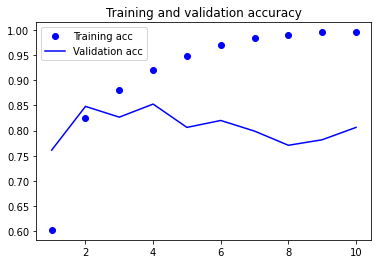

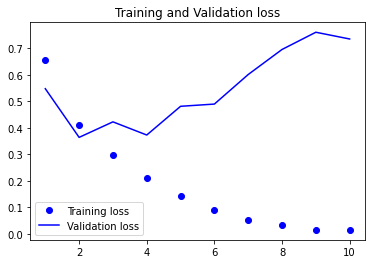

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# LSTM

In [ ]:
# output_t = activation(c_t) * activation(dot(input_t, Wo) + dot(state_t, Uo) + bo)

# i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
# f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
# k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

In [ ]:
# c_t + 1 = i_t * k_t + c_t * f_t

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics = ['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 59s 358ms/step - loss: 0.5266 - acc: 0.7476 - val_loss: 0.3631 - val_acc: 0.8436
Epoch 2/10
157/157 [==============================] - 56s 358ms/step - loss: 0.3086 - acc: 0.8773 - val_loss: 0.4220 - val_acc: 0.8582
Epoch 3/10
157/157 [==============================] - 56s 359ms/step - loss: 0.2442 - acc: 0.9074 - val_loss: 0.3263 - val_acc: 0.8780
Epoch 4/10
157/157 [==============================] - 56s 355ms/step - loss: 0.2060 - acc: 0.9227 - val_loss: 0.3379 - val_acc: 0.8574
Epoch 5/10
157/157 [==============================] - 56s 358ms/step - loss: 0.1845 - acc: 0.9329 - val_loss: 0.3265 - val_acc: 0.8756
Epoch 6/10
157/157 [==============================] - 55s 353ms/step - loss: 0.1647 - acc: 0.9425 - val_loss: 0.4099 - val_acc: 0.8518
Epoch 7/10
157/157 [==============================] - 56s 357ms/step - loss: 0.1505 - acc: 0.9469 - val_loss: 0.3205 - val_acc: 0.8822
Epoch 8/10
157/157 [==============================] - 5

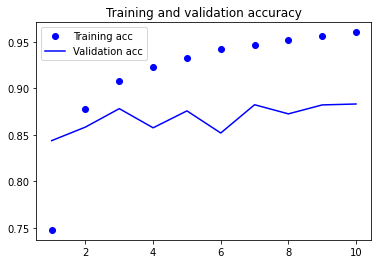

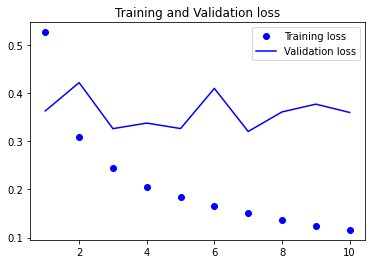

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()